In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
df_paying_of_region = pd.read_excel('/Users/sonyasha/Documents/study/gender_analisys/Приложение к сборнику Женщины и мужчины/R_4_3_pril.xlsx')

In [4]:
df_paying_of_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Средняя заработная плата работников  97 non-null     object
 1   Unnamed: 1                           98 non-null     object
 2   Unnamed: 2                           97 non-null     object
 3   Unnamed: 3                           97 non-null     object
 4   Unnamed: 4                           97 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [5]:
df_paying_of_region.rename(columns={'Средняя заработная плата работников': 'Region',
                                    'Unnamed: 1': 'Average_women_salary', 
                                    'Unnamed: 2': 'Average_men_salary',
                                    'Unnamed: 3': 'Women_to_men_salary_ratio',
                                    'Unnamed: 4': 'Womens_percentage_in_general_workforce'
                                   }, inplace=True)

In [6]:
df_paying_of_region.drop(labels=[0,1,2],axis=0,inplace=True)

In [7]:
df_paying_of_region['Average_women_salary'] = df_paying_of_region.Average_women_salary.astype('float')
df_paying_of_region['Average_men_salary'] = df_paying_of_region.Average_men_salary.astype('float')
df_paying_of_region['Women_to_men_salary_ratio'] = df_paying_of_region.Women_to_men_salary_ratio.astype('float')
df_paying_of_region['Womens_percentage_in_general_workforce'] = df_paying_of_region.Womens_percentage_in_general_workforce.astype('float')


In [8]:
df_paying_of_region.head(5)

,Region,Average_women_salary,Average_men_salary,Women_to_men_salary_ratio,Womens_percentage_in_general_workforce
3,Российская Федерация,37871.658061,52532.708511,72.091577,53.22694
4,Центральный федеральный округ,44336.012955,57711.921853,76.822971,52.57608
5,Белгородская область,31105.842284,39966.872605,77.829063,52.25989
6,Брянская область,25282.041814,33424.005888,75.640370,55.08514
7,Владимирская область,30105.172162,39248.843377,76.703336,57.19788


In [9]:
list_of_areas = ['Центральный федеральный округ', 
                 'Дальневосточный федеральный округ',
                 'Сибирский федеральный округ', 
                 'Уральский федеральный округ',
                 'Приволжский федеральный округ',
                 'Северо-Кавказский федеральный округ',
                 'Южный федеральный округ',
                 'Северо-Западный федеральный округ']

In [10]:
df_areas = df_paying_of_region[df_paying_of_region['Region'].isin(list_of_areas)]

In [11]:
df_paying_of_region = df_paying_of_region.set_index('Region')
df_regions = df_paying_of_region.drop(['Российская Федерация', 'Центральный федеральный округ', 
                 'Дальневосточный федеральный округ',
                 'Сибирский федеральный округ', 
                 'Уральский федеральный округ',
                 'Приволжский федеральный округ',
                 'Северо-Кавказский федеральный округ',
                 'Южный федеральный округ',
                 'Северо-Западный федеральный округ'], axis=0)

In [12]:
df_regions.head()

,Average_women_salary,Average_men_salary,Women_to_men_salary_ratio,Womens_percentage_in_general_workforce
Region,,,,
Белгородская область,31105.842284,39966.872605,77.829063,52.25989
Брянская область,25282.041814,33424.005888,75.640370,55.08514
Владимирская область,30105.172162,39248.843377,76.703336,57.19788
Воронежская область,31127.016566,41131.373061,75.677067,54.69041
Ивановская область,24944.968012,31452.071954,79.311048,62.41403


In [13]:
df_areas[df_areas['Average_women_salary'] == min(df_areas['Average_women_salary'])]

,Region,Average_women_salary,Average_men_salary,Women_to_men_salary_ratio,Womens_percentage_in_general_workforce
45,Северо-Кавказский федеральный округ,23605.666283,28878.396419,81.74161,61.9977


In [14]:
df_areas[df_areas['Average_women_salary'] == max(df_areas['Average_women_salary'])]

,Region,Average_women_salary,Average_men_salary,Women_to_men_salary_ratio,Womens_percentage_in_general_workforce
87,Дальневосточный федеральный округ,47822.338255,68314.933042,70.002759,50.67817


<AxesSubplot:title={'center':'Разница в оплате труда женщин и мужчин в различных округах'}, xlabel='Федеральный округ', ylabel='Средний размер оплаты труда'>

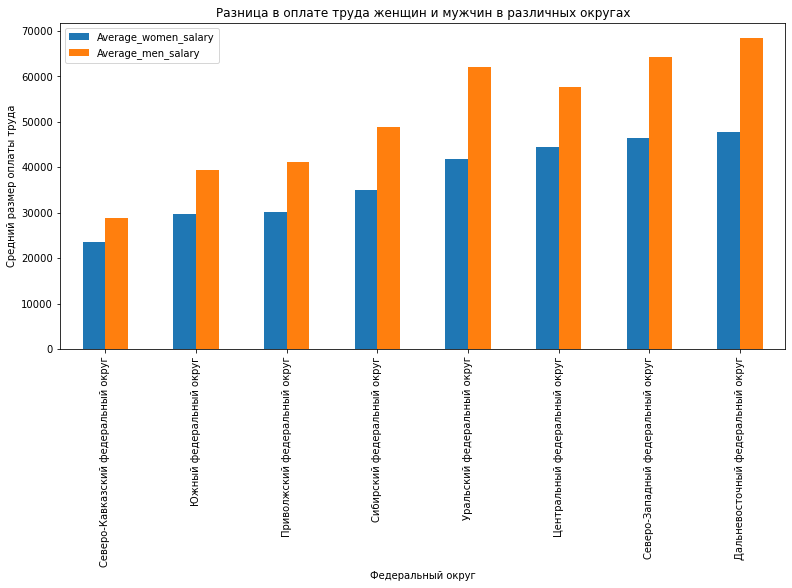

In [15]:
raiting = df_areas[['Region', 'Average_women_salary', 'Average_men_salary']].sort_values(by='Average_women_salary')
raiting.plot.bar(title='Разница в оплате труда женщин и мужчин в различных округах',
                 x='Region',
                 xlabel='Федеральный округ',
                 ylabel='Средний размер оплаты труда')

<AxesSubplot:title={'center':'Зависимость между представленностью женщин в рабочей силе и долей оплаты труда'}, xlabel='Womens_percentage_in_general_workforce', ylabel='Women_to_men_salary_ratio'>

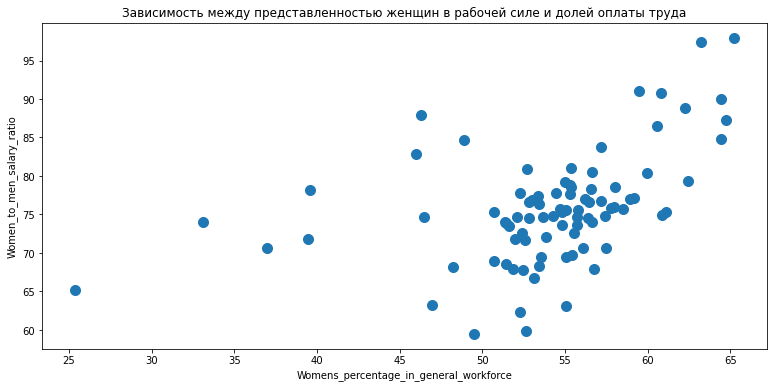

In [16]:
df_regions.plot(kind='scatter',
                title='Зависимость между представленностью женщин в рабочей силе и долей оплаты труда',
                x='Womens_percentage_in_general_workforce',
                y='Women_to_men_salary_ratio',
                s=100)

<AxesSubplot:ylabel='Average_women_salary'>

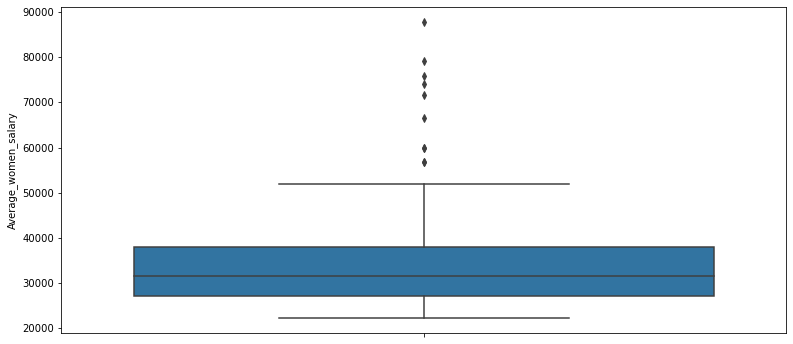

In [17]:
sns.boxplot(y='Average_women_salary',
            data=df_regions)

<AxesSubplot:ylabel='Average_men_salary'>

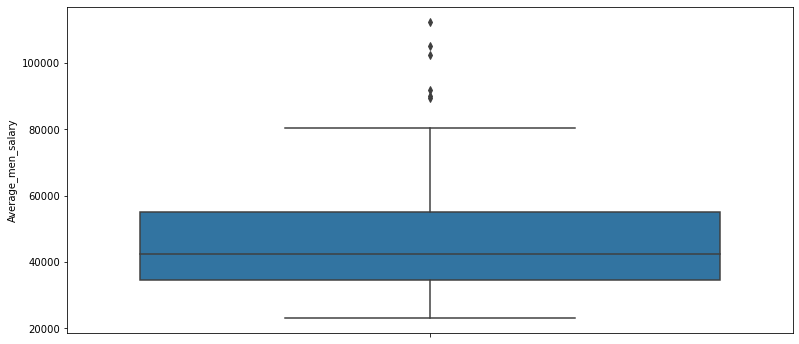

In [18]:
sns.boxplot(y='Average_men_salary',
            data=df_regions)

На основании графиков, мы видим, что средний уровень оплаты труда мужчин выше, чем средний уровень оплаты труда женщин. При этом, в зарплате мужчин выбросами считается уровень выше 80тыс. рублей в месяц, в том время как у женщин выбросом считается оплата труда выше 50 тыс. рублей в месяц. 
На основании приведенныхграфиков также можно предположить, что включенность в рабочую силу влияет на уровень оплаты труда среди всей группы в сторону повышения. 
Гипотеза: чем больше женщин включено в рабочую силу в регионе, тем выше средняя оплата труда

In [19]:
df = pd.read_excel('/Users/sonyasha/Documents/study/gender_analisys/Приложение к сборнику Женщины и мужчины/R_4_1_pril.xlsx')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Занятые     99 non-null     object
 1   Unnamed: 1  98 non-null     object
 2   Unnamed: 2  97 non-null     object
 3   Unnamed: 3  98 non-null     object
 4   Unnamed: 4  97 non-null     object
dtypes: object(5)
memory usage: 4.1+ KB


In [21]:
df.head()

,Занятые,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,4.1. Уровень участия в составе рабочей силы и...,NaN,NaN,NaN,NaN
1,В процентах,NaN,NaN,NaN,NaN
2,NaN,Уровень участия в составе рабочей силы,NaN,Уровень занятости,NaN
3,NaN,женщины,мужчины,женщины,мужчины
4,Российская Федерация,79.0966,85.1459,75.2886,80.9837


In [22]:
df.rename(columns={'Занятые ': 'Region', 
                   'Unnamed: 1': 'Womens_economic_activity_rate',
                   'Unnamed: 2': 'Mens_economic_activity_rate',
                   'Unnamed: 3': 'Womens_employment_rate',
                   'Unnamed: 4': 'Mens_employment_rate'}, inplace=True)

In [23]:
df.drop(labels=[0,1,2,3,96], axis=0, inplace=True)

In [24]:
df['Womens_economic_activity_rate'] = df.Womens_economic_activity_rate.astype('float')
df['Mens_economic_activity_rate'] = df.Mens_economic_activity_rate.astype('float')
df['Womens_employment_rate'] = df.Womens_employment_rate.astype('float')
df['Mens_employment_rate'] = df.Mens_employment_rate.astype('float')

In [25]:
df_regions_extended = df_regions.merge(df, left_on='Region', right_on='Region', how='inner')

In [26]:
df_regions_extended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region                                  85 non-null     object 
 1   Average_women_salary                    85 non-null     float64
 2   Average_men_salary                      85 non-null     float64
 3   Women_to_men_salary_ratio               85 non-null     float64
 4   Womens_percentage_in_general_workforce  85 non-null     float64
 5   Womens_economic_activity_rate           85 non-null     float64
 6   Mens_economic_activity_rate             85 non-null     float64
 7   Womens_employment_rate                  85 non-null     float64
 8   Mens_employment_rate                    85 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.6+ KB


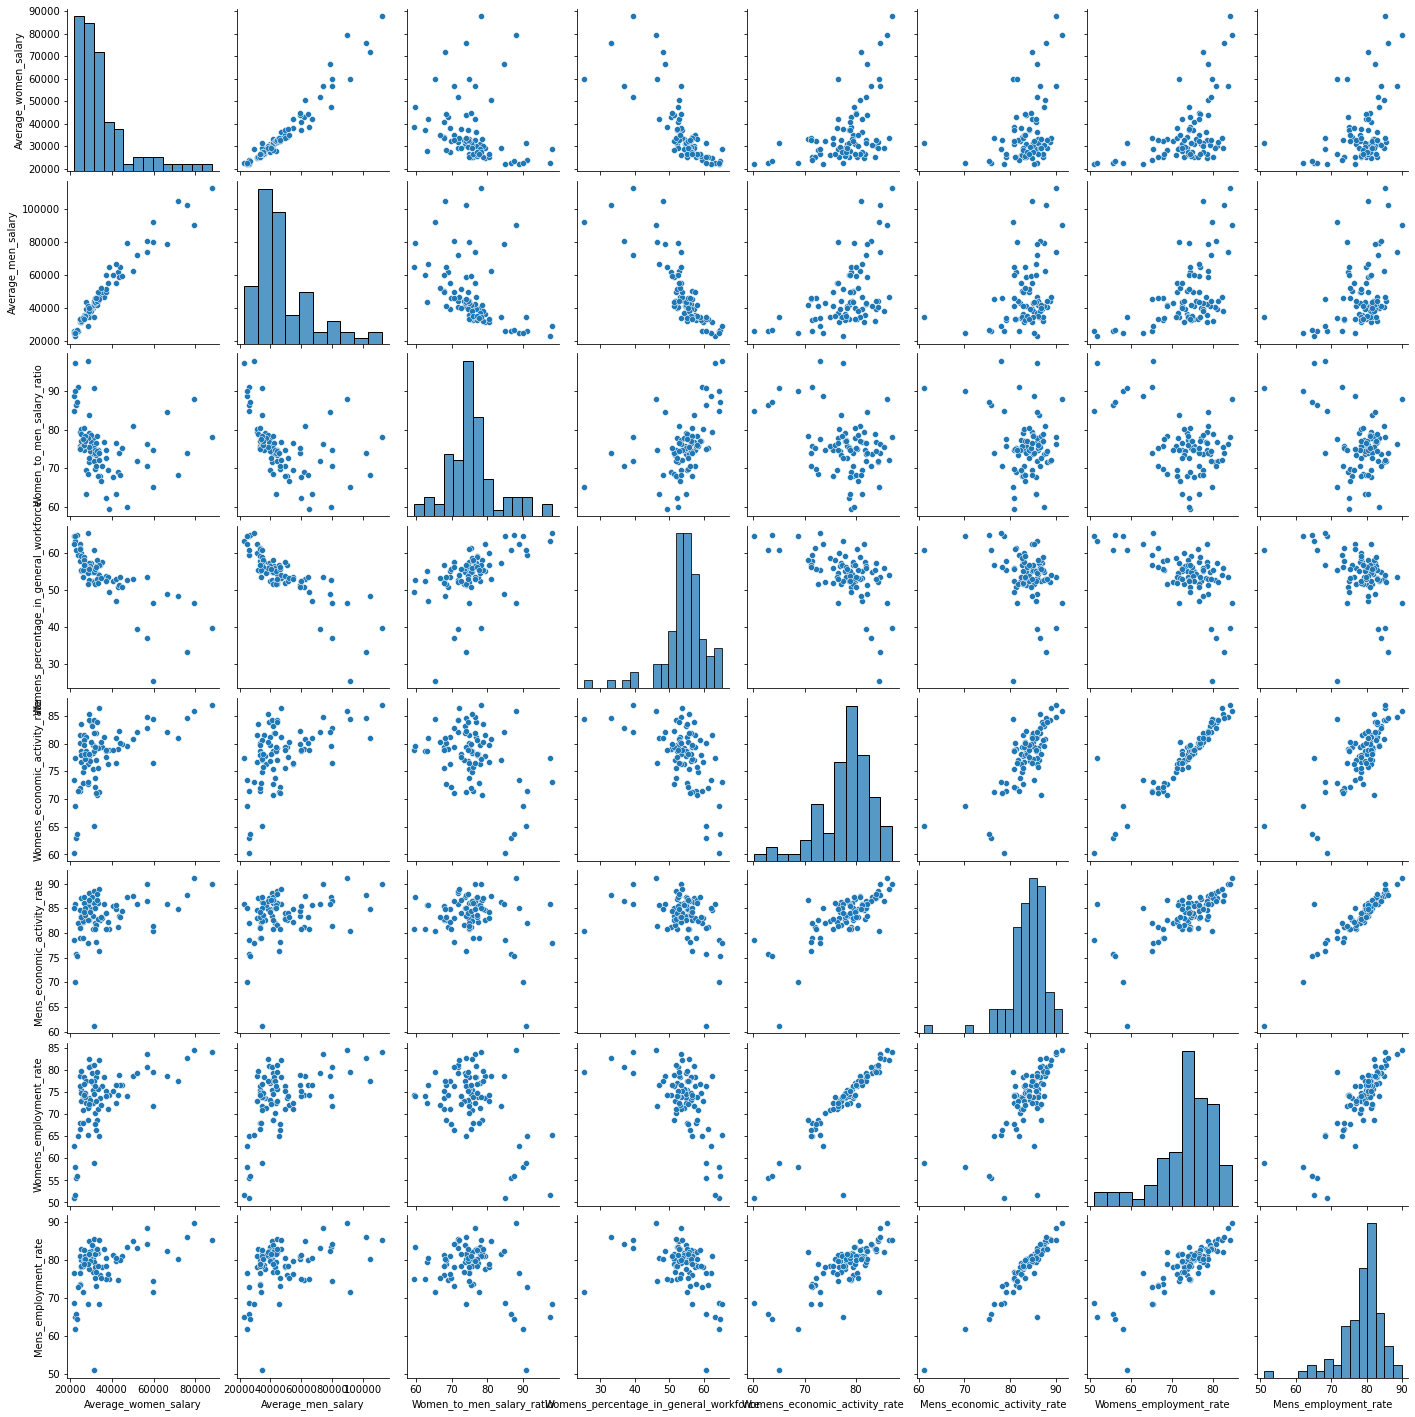

In [27]:
sns.pairplot(df_regions_extended)

In [28]:
df_regions_extended.corr(method='kendall')

,Average_women_salary,Average_men_salary,Women_to_men_salary_ratio,Womens_percentage_in_general_workforce,Womens_economic_activity_rate,Mens_economic_activity_rate,Womens_employment_rate,Mens_employment_rate
Average_women_salary,1.000000,0.873389,-0.366947,-0.621849,0.338936,0.209524,0.337255,0.267787
Average_men_salary,0.873389,1.000000,-0.493557,-0.663305,0.349020,0.196078,0.339496,0.254342
Women_to_men_salary_ratio,-0.366947,-0.493557,1.000000,0.392157,-0.171989,0.005602,-0.135574,-0.024650
Womens_percentage_in_general_workforce,-0.621849,-0.663305,0.392157,1.000000,-0.357423,-0.216807,-0.363585,-0.301961
Womens_economic_activity_rate,0.338936,0.349020,-0.171989,-0.357423,1.000000,0.536695,0.849300,0.565826
Mens_economic_activity_rate,0.209524,0.196078,0.005602,-0.216807,0.536695,1.000000,0.530532,0.803922
Womens_employment_rate,0.337255,0.339496,-0.135574,-0.363585,0.849300,0.530532,1.000000,0.619048
Mens_employment_rate,0.267787,0.254342,-0.024650,-0.301961,0.565826,0.803922,0.619048,1.000000


<AxesSubplot:>

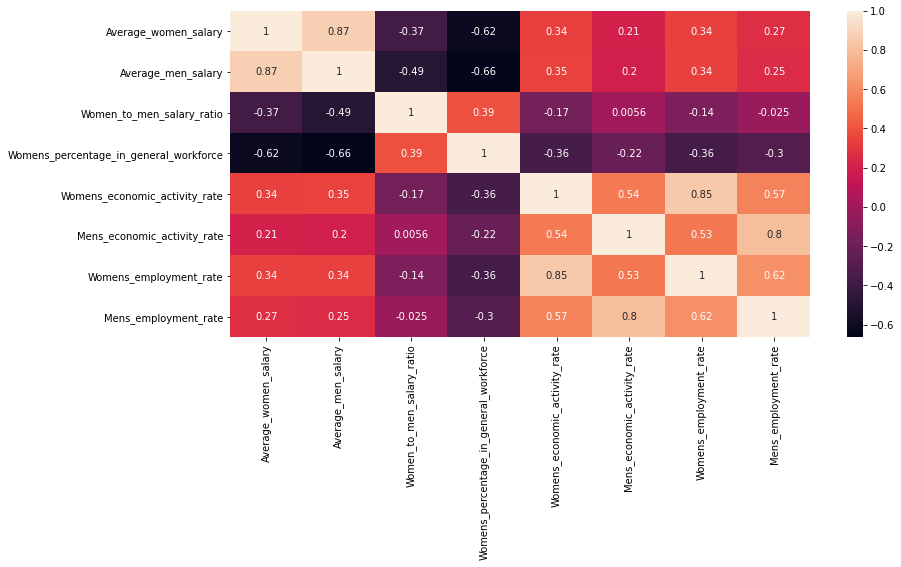

In [29]:
sns.heatmap(df_regions_extended.corr(method='kendall'), annot=True)

In [30]:
df_regions_extended.columns

Index(['Region', 'Average_women_salary', 'Average_men_salary',
       'Women_to_men_salary_ratio', 'Womens_percentage_in_general_workforce',
       'Womens_economic_activity_rate', 'Mens_economic_activity_rate',
       'Womens_employment_rate', 'Mens_employment_rate'],
      dtype='object')

In [31]:
X, y = df_regions_extended[['Average_men_salary',
       'Women_to_men_salary_ratio', 'Womens_percentage_in_general_workforce',
       'Womens_economic_activity_rate', 'Mens_economic_activity_rate',
       'Womens_employment_rate', 'Mens_employment_rate']], df_regions_extended['Average_women_salary'] 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_

array([   0.74445474,  516.65397288,   24.53014713, -132.85649131,
       -201.93041234,  152.21532377,  248.32357391])

In [38]:
model.intercept_

-43891.29709807074

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [42]:
folds = KFold(n_splits=5, shuffle=True, random_state=43)

In [52]:
cv_4_results = cross_val_score(model, X_train, y_train, cv=folds, scoring='r2').mean()

In [53]:
print(cv_4_results)

0.9826075081381382


In [45]:
model.score(X_test, y_test)

0.9960069885828617